# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


In [4]:
cities

['atuona',
 'taolanaro',
 'kapaa',
 'daru',
 'pinotepa nacional',
 'yellowknife',
 'hilo',
 'illoqqortoormiut',
 'saldanha',
 'chengde',
 'ushuaia',
 'huarmey',
 'aklavik',
 'busselton',
 'isangel',
 'port alfred',
 'cape town',
 'punta arenas',
 'nikolskoye',
 'turukhansk',
 'miramar',
 'bluff',
 'clyde river',
 'grand river south east',
 'east london',
 'pekan',
 'cabo san lucas',
 'vaini',
 'butaritari',
 'kodiak',
 'namibe',
 'khatanga',
 'cairns',
 'mataura',
 'ciudad bolivar',
 'lavrentiya',
 'hobart',
 'jiroft',
 'amderma',
 'kupang',
 'new norfolk',
 'hobyo',
 'victoria',
 'beringovskiy',
 'saint-augustin',
 'ukiah',
 'avarua',
 'flinders',
 'imbituba',
 'albany',
 'whitehorse',
 'belance',
 'attawapiskat',
 'akyab',
 'jamestown',
 'lorengau',
 'petropavlovsk-kamchatskiy',
 'bokspits',
 'dunedin',
 'saint anthony',
 'chokurdakh',
 'biskamzha',
 'san andres',
 'arraial do cabo',
 'kristiinankaupunki',
 'leesburg',
 'rikitea',
 'sentyabrskiy',
 'faanui',
 'port elizabeth',
 'hamb

In [6]:
cities_df=pd.read_csv("../output_data/cities.csv")




cities_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,london,51.5085,-0.1257,50.36,94,75,4.61,GB,2023-03-28 19:51:30
1,1,hermanus,-34.4187,19.2345,58.80,73,100,6.49,ZA,2023-03-28 19:52:28
2,2,padang,-0.9492,100.3543,82.45,69,50,2.35,ID,2023-03-28 19:52:28
3,3,torbay,47.6666,-52.7314,32.29,91,75,13.80,CA,2023-03-28 19:52:29
4,4,tulum,20.2167,-87.4667,73.96,87,51,5.03,MX,2023-03-28 19:52:29
5,5,east london,-33.0153,27.9116,63.30,75,25,22.46,ZA,2023-03-28 19:52:30
6,6,vaini,-21.2000,-175.2000,84.36,84,40,8.05,TO,2023-03-28 19:52:30
7,7,kapaa,22.0752,-159.3190,80.92,80,40,12.66,US,2023-03-28 19:52:30
8,8,punta arenas,-53.1500,-70.9167,35.71,80,20,23.02,CL,2023-03-28 19:52:16
9,9,thompson,55.7435,-97.8558,8.76,72,100,13.80,CA,2023-03-28 19:52:31


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [83]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?&units=imperial&appid="+weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city
  
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
      
#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
       
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | daru
Processing Record 5 of Set 1 | pinotepa nacional
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | saldanha
Processing Record 10 of Set 1 | chengde
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | huarmey
Processing Record 13 of Set 1 | aklavik
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | isangel
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | turukhansk
Processing Record 21 of Set 1 | miramar
Processing Record

Processing Record 32 of Set 4 | chenzhou
Processing Record 33 of Set 4 | asau
Processing Record 34 of Set 4 | barrow
Processing Record 35 of Set 4 | kloulklubed
Processing Record 36 of Set 4 | luderitz
Processing Record 37 of Set 4 | sinnamary
Processing Record 38 of Set 4 | wanaka
Processing Record 39 of Set 4 | saleaula
City not found. Skipping...
Processing Record 40 of Set 4 | weligama
Processing Record 41 of Set 4 | buin
Processing Record 42 of Set 4 | morgan city
Processing Record 43 of Set 4 | manaus
Processing Record 44 of Set 4 | biak
Processing Record 45 of Set 4 | uyuni
Processing Record 46 of Set 4 | vardo
Processing Record 47 of Set 4 | mount pleasant
Processing Record 48 of Set 4 | narsaq
Processing Record 49 of Set 4 | saryg-sep
Processing Record 0 of Set 5 | karratha
Processing Record 1 of Set 5 | lesnoy
Processing Record 2 of Set 5 | iquitos
Processing Record 3 of Set 5 | maturin
Processing Record 4 of Set 5 | ixtapa
Processing Record 5 of Set 5 | port lincoln
Processi

Processing Record 19 of Set 8 | jieshi
Processing Record 20 of Set 8 | darnah
Processing Record 21 of Set 8 | bilma
Processing Record 22 of Set 8 | taltal
Processing Record 23 of Set 8 | luziania
Processing Record 24 of Set 8 | chekmagush
Processing Record 25 of Set 8 | chulman
Processing Record 26 of Set 8 | berdigestyakh
Processing Record 27 of Set 8 | aldan
Processing Record 28 of Set 8 | gandajika
Processing Record 29 of Set 8 | ushtobe
Processing Record 30 of Set 8 | tvoroyri
Processing Record 31 of Set 8 | iqaluit
Processing Record 32 of Set 8 | gigmoto
Processing Record 33 of Set 8 | japura
Processing Record 34 of Set 8 | preobrazheniye
Processing Record 35 of Set 8 | brae
Processing Record 36 of Set 8 | inhapim
Processing Record 37 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 38 of Set 8 | kudahuvadhoo
Processing Record 39 of Set 8 | pauri
Processing Record 40 of Set 8 | codrington
Processing Record 41 of Set 8 | douglas
Processing Record 42 of Set 8 | b

Processing Record 7 of Set 12 | empangeni
Processing Record 8 of Set 12 | brest
Processing Record 9 of Set 12 | acarau
Processing Record 10 of Set 12 | lazaro cardenas
Processing Record 11 of Set 12 | san cristobal
Processing Record 12 of Set 12 | xinye
Processing Record 13 of Set 12 | sicuani
Processing Record 14 of Set 12 | port hardy
Processing Record 15 of Set 12 | manzhouli
Processing Record 16 of Set 12 | wahran
City not found. Skipping...
Processing Record 17 of Set 12 | umm kaddadah
Processing Record 18 of Set 12 | viransehir
Processing Record 19 of Set 12 | tecoanapa
Processing Record 20 of Set 12 | smithers
Processing Record 21 of Set 12 | poshekhonye
Processing Record 22 of Set 12 | gat
Processing Record 23 of Set 12 | sembakung
Processing Record 24 of Set 12 | auki
Processing Record 25 of Set 12 | lushunkou
City not found. Skipping...
Processing Record 26 of Set 12 | dickson
Processing Record 27 of Set 12 | dubbo
Processing Record 28 of Set 12 | fiche
Processing Record 29 o

In [84]:
print(city_weather)

{'coord': {'lon': 27.4167, 'lat': -7.3}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 67.1, 'feels_like': 67.87, 'temp_min': 67.1, 'temp_max': 67.1, 'pressure': 1014, 'humidity': 93, 'sea_level': 1014, 'grnd_level': 945}, 'visibility': 10000, 'wind': {'speed': 1.36, 'deg': 140, 'gust': 1.36}, 'clouds': {'all': 92}, 'dt': 1680381485, 'sys': {'country': 'CD', 'sunrise': 1680322385, 'sunset': 1680365717}, 'timezone': 7200, 'id': 209598, 'name': 'Manono', 'cod': 200}


In [85]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [86]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,80.44,79,17,15.84,PF,1680381223
1,kapaa,22.0752,-159.3190,73.72,91,100,6.91,US,1680381167
2,daru,-9.0763,143.2092,79.00,85,49,3.65,PG,1680381224
3,pinotepa nacional,16.3167,-98.0167,91.40,40,11,12.35,MX,1680381225
4,yellowknife,62.4560,-114.3525,10.92,61,100,21.85,CA,1680381005


In [87]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [88]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,80.44,79,17,15.84,PF,1680381223
1,kapaa,22.0752,-159.3190,73.72,91,100,6.91,US,1680381167
2,daru,-9.0763,143.2092,79.00,85,49,3.65,PG,1680381224
3,pinotepa nacional,16.3167,-98.0167,91.40,40,11,12.35,MX,1680381225
4,yellowknife,62.4560,-114.3525,10.92,61,100,21.85,CA,1680381005


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

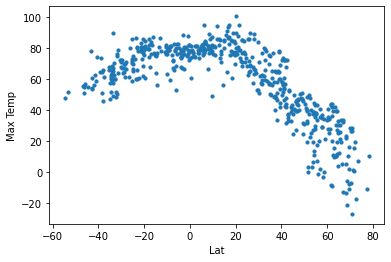

In [89]:
# Build scatter plot for latitude vs. temperature
x_limit = 100

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(-100, x_limit, 10)

city_data_df.plot.scatter(x="Lat", y="Max Temp", s=10)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
#plt.show()

#### Latitude Vs. Humidity

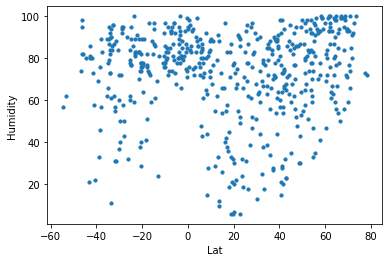

In [90]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x="Lat", y="Humidity", s=10)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

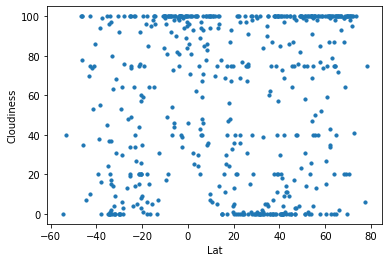

In [91]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
city_data_df.plot.scatter(x="Lat", y="Cloudiness", s=10)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

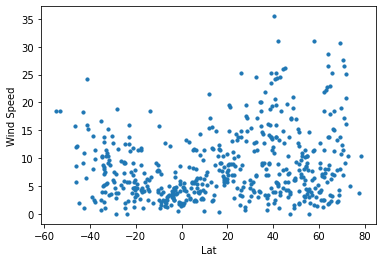

In [92]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
city_data_df.plot.scatter(x="Lat", y="Wind Speed", s=10)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [93]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()


In [94]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kapaa,22.0752,-159.3190,73.72,91,100,6.91,US,1680381167
3,pinotepa nacional,16.3167,-98.0167,91.40,40,11,12.35,MX,1680381225
4,yellowknife,62.4560,-114.3525,10.92,61,100,21.85,CA,1680381005
5,hilo,19.7297,-155.0900,83.28,77,75,5.75,US,1680381226
7,chengde,40.9725,117.9361,46.71,64,73,2.57,CN,1680381227


In [95]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,80.44,79,17,15.84,PF,1680381223
2,daru,-9.0763,143.2092,79.00,85,49,3.65,PG,1680381224
6,saldanha,-33.0117,17.9442,62.64,86,0,10.36,ZA,1680381226
8,ushuaia,-54.8000,-68.3000,47.86,57,0,18.41,AR,1680381100
9,huarmey,-10.0681,-78.1522,78.53,78,100,7.65,PE,1680381193


###  Temperature vs. Latitude Linear Regression Plot

The r-square is -0.8719893896230113
y = -1.16x + 96.05


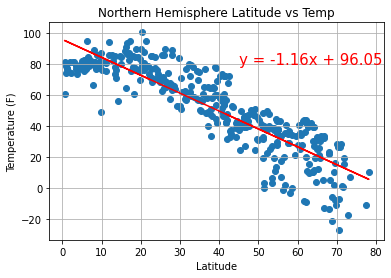

In [99]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
regEQplotX = 45
regEQplotY = 80
y_label = "Temperature (F)"
plt.title(f'Northern Hemisphere Latitude vs Temp')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Temp')
plt.show()


The r-square is 0.6210550715121362
y = 0.47x + 81.1


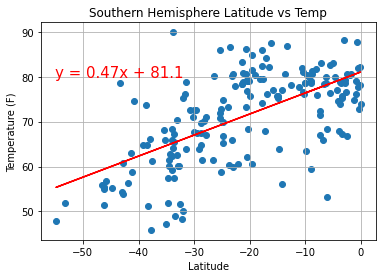

In [103]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
regEQplotX = -55
regEQplotY = 80
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Temp')
plt.show()

**Discussion about the linear relationship:** The further you move from the equator, the colder the temperature gets

### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.24305885896034551
y = 0.27x + 60.38


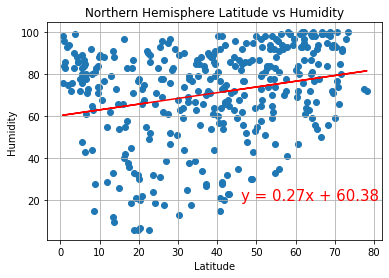

In [104]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
regEQplotX = 46
regEQplotY = 20
y_label = "Humidity"
plt.title(f'Northern Hemisphere Latitude vs Humidity')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Humidity')
plt.show()

The r-square is 0.2778557407330097
y = 0.36x + 84.24


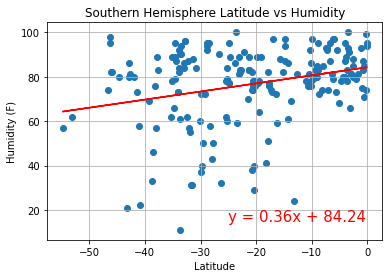

In [106]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
regEQplotX = -25
regEQplotY = 15
y_label = "Humidity (F)"
plt.title(f'Southern Hemisphere Latitude vs Humidity')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Humidity')
plt.show()

**Discussion about the linear relationship:** The results reveal that in the Southern Hemisphere, the closer you get to the equator the more humid it is, as opposed to the northern hemisphere, where the farther away from the equator you are the more humid it is.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is 0.10761399623107826
y = 0.21x + 49.4


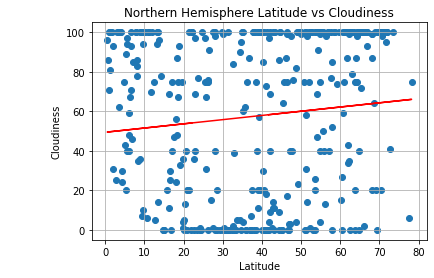

In [107]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
regEQplotX = -25
regEQplotY = 40
y_label = "Cloudiness"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Cloudiness')
plt.show()

The r-square is 0.3989509788241059
y = 1.16x + 81.83


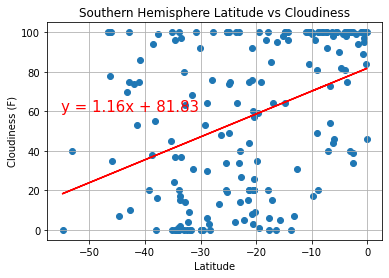

In [108]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
regEQplotX = -55
regEQplotY = 60
y_label = "Cloudiness (F)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Cloudiness')
plt.show()

**Discussion about the linear relationship:** The results reveal that in the Southern Hemisphere, the closer you are to the equator you are the cloudier it is.  In the Norther Hempisphere, the farther you are from the equator cloudier it is.  

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is 0.17954299086379916
y = 0.06x + 7.32


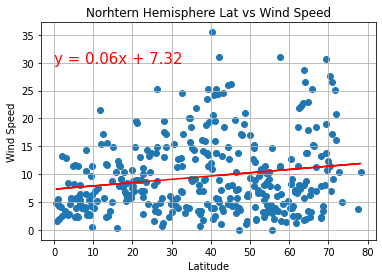

In [110]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
regEQplotX = 0
regEQplotY = 30
y_label = "Wind Speed"
plt.title(f'Norhtern Hemisphere Lat vs Wind Speed')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Lat vs Wind Speed')
plt.show()

The r-square is -0.4612845186433312
y = -0.16x + 3.21


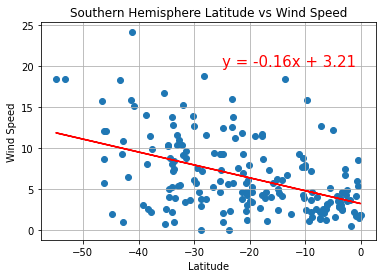

In [112]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
regEQplotX = -25
regEQplotY = 20
y_label = "Wind Speed"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Wind Speed')
plt.show()

**Discussion about the linear relationship:** The results show that the closer you are to the equator the less wind you will experience.  